In [1]:
# Скачайте набор данных с тремя переменными: sex, exang, num. 
# Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание 
# сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). 
# Обучите дерево решений на этих данных, используйте entropy в качестве критерия.

# Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.
# В ответе необходимо указать число с точностью 3 знака после запятой.

In [2]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('../../../resources/train_data_tree.csv')
df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [4]:
x_train = df[['sex', 'exang']]
x_train.head()

,sex,exang
0,1,1
1,1,1
2,1,0
3,1,0
4,1,0


In [5]:
y_train = df['num']
y_train.head()

0    1
1    1
2    1
3    0
4    1
Name: num, dtype: int64

In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(167.4, 163.07999999999998, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.826\nsamples = 81\nvalue = [21, 60]')]

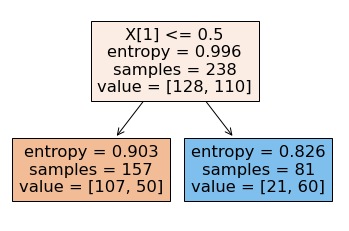

In [7]:
tree.plot_tree(clf, filled=True)

In [8]:
# plt.figure(figsize=(40, 20),dpi=80)
# p = tree.plot_tree(clf, fontsize=18,filled=True,feature_names=list(X))

In [9]:
clf.tree_.children_left

array([ 1, -1, -1])

In [13]:
clf.tree_.children_right

array([ 2, -1, -1])

In [10]:
clf.tree_.n_node_samples

array([238, 157,  81])

In [11]:
clf.tree_.impurity


array([0.99587   , 0.90271134, 0.82562653])

In [19]:
clf.tree_.feature

array([ 1, -2, -2])

In [12]:
help(tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child 

In [22]:
inf_gain = clf.tree_.impurity[0] - sum([clf.tree_.n_node_samples[i]*clf.tree_.impurity[i] for i in range(1, 3)]) \
    / clf.tree_.n_node_samples[0]

In [23]:
inf_gain

0.11939340343891591

In [24]:
f"{inf_gain:.3f}"

'0.119'